## Complete Case Analysis (CCA)
<mark>This technique is not used that often because of many reasons, one of the most crucial reason is <i>When using our models in production, hte model will not know how to handle with the missing data.</i> </mark>
<br>
<br>
**Where do we use it :**
* Your data is missing completly at random. <mark>(MCAR)</mark>
* Generally if the missing data is less than 5% in that column.
<br>
<br>
> Syntax : df.dropna()

## Univeriate Imputation
#### Advantages
- **Simple to implement**: Univariate imputation is a straightforward method that can be easily implemented in most programming languages.  
- **Fast computation**: Univariate imputation is computationally efficient and can handle large datasets quickly.  
- **Easy to interpret**: The results of univariate imputation are easy to understand and interpret.  

#### Disadvantages  
- **Assumes independence**: Univariate imputation assumes that the missing values are independent of the other variables, which may not always be the case.  
- **Ignores relationships**: Univariate imputation ignores the relationships between variables, which can lead to biased estimates.  
- **May not handle non-normal data**: Univariate imputation assumes normality of the data, which may not be true for all datasets.  
- **Can lead to over-imputation**: Univariate imputation can lead to over-imputation, where the same value is imputed for multiple missing values.  

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer    
from sklearn.compose import ColumnTransformer  

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day36-imputing-numerical-data/titanic_toy.csv')

In [24]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [25]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

trf1 = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
],remainder='passthrough')

X_train_transformed = trf1.fit_transform(X_train)
X_test_transformed = trf1.transform(X_test)

# Make DataFrame from transformed data
transformed_df = pd.DataFrame(X_train_transformed, columns=['Age', 'Fare', 'Family'])
trained_df = pd.DataFrame(X_train, columns=['Age', 'Fare', 'Family'])



In [27]:
trained_df.head()

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6


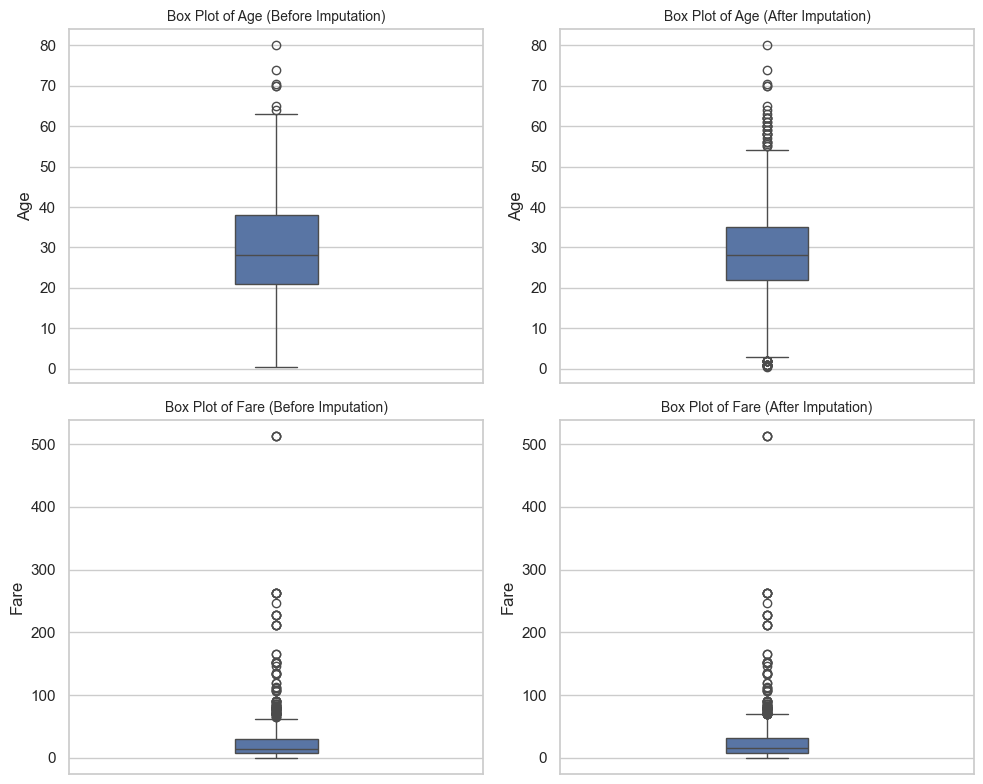

In [44]:
sns.set(style="whitegrid")

# Create a figure with four subplots (2 rows, 2 columns)
plt.figure(figsize=(10, 8))  # Adjusted figure size for 4 plots

# First subplot: Age before imputation
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first plot
sns.boxplot(data=trained_df, y='Age', width=0.2)
plt.title('Box Plot of Age (Before Imputation)', fontsize=10)

# Second subplot: Age after imputation
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second plot
sns.boxplot(data=transformed_df, y='Age', width=0.2)
plt.title('Box Plot of Age (After Imputation)', fontsize=10)

# Third subplot: Fare before imputation
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, third plot
sns.boxplot(data=trained_df, y='Fare', width=0.2)
plt.title('Box Plot of Fare (Before Imputation)', fontsize=10)

# Fourth subplot: Fare after imputation
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, fourth plot
sns.boxplot(data=transformed_df, y='Fare', width=0.2)
plt.title('Box Plot of Fare (After Imputation)', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()